In [1]:
import numpy as np
import itertools as itr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

def comp(row):
    if row["result1"] > row["result2"]:
        return 1
    else:
        return 0
    
def dif(row):
    return row["result1"] - row["result2"]

# preparation

In [2]:
with open("net1_extra.txt", "r") as f:
    l1 = f.readlines()
    
result1 = np.ones(81)
for i, t in enumerate(l1[:10]):
    result1[i] = t[4:12]
    
for i, t in enumerate(l1[10:81]):
    result1[i+10] = t[4:13]

In [3]:
with open("net2_extra.txt", "r") as f:
    l2 = f.readlines()

result2 = np.ones(81)
for i, t in enumerate(l2[:10]):
    result2[i] = t[4:12]
    
for i, t in enumerate(l2[10:81]):
    result2[i+10] = t[4:13]

# results

In [4]:
# make dataframe
df = np.ones((81, 6))
netsize=[32, 48, 64]
beta1=[0.0, 0.5, 0.9]
alpha=[0.005, 0.01, 0.05]
weight_decay = [0.0, 0.0001, 0.0005]

combinations = itr.product(netsize, beta1, alpha, weight_decay)
for i, t in enumerate(combinations):
    df[i, :4] = t
    df[i, 4] = result1[i]
    df[i, 5] = result2[i]
    
df = pd.DataFrame(df, columns=["netsize", "beta1", "alpha", "weight_decay", "result1", "result2"])
df["proposal_win"] = df.apply(comp, axis = 1)
df["emd_dif"] = df.apply(dif, axis = 1)

/Users/keiikegami/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


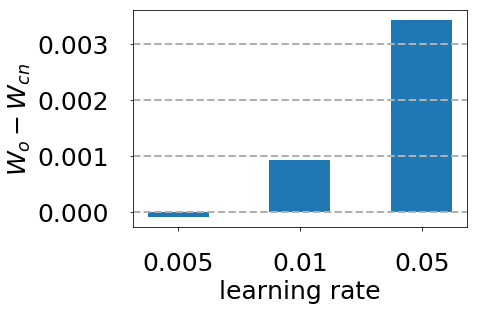

In [5]:
# fig5
df["dif_mean"] = df.groupby("alpha")["emd_dif"].transform("mean")
means = np.unique(df["dif_mean"].data)
fig = plt.figure(figsize=(6, 4))
al = ["0.005", "0.01", "0.05"]
plt.bar(al, means, width=0.5)
plt.yticks([0.000, 0.001, 0.002, 0.003])
plt.tick_params(direction='out',
                pad=20,
                labelsize=25
                )
plt.xlabel("learning rate", fontsize=25)
plt.ylabel(r"$W_{o} - W_{cn}$", fontsize=25)
plt.grid(axis='y', linestyle='--', linewidth=2)
plt.savefig("barplot.png", bbox_inches="tight", dpi=300)
plt.show()

In [6]:
# regression result
result = sm.ols(formula="emd_dif ~ netsize + beta1 + alpha + weight_decay -1", data=df).fit()

In [7]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                emd_dif   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.292
Date:                Thu, 23 May 2019   Prob (F-statistic):             0.0152
Time:                        12:22:17   Log-Likelihood:                 302.48
No. Observations:                  81   AIC:                            -597.0
Df Residuals:                      77   BIC:                            -587.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
netsize      -4.047e-05   2.55e-05     -1.589   